# Ikä- ja tunneilmiön ennustus kuvista (MobileNet)


1. Tuodaan tarvittavat kirjastot ja määritellään luokat

In [121]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import load_img, img_to_array

age_labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

3. Ladataan valmiiksi koulutetut mallit

In [122]:
model_age = load_model("age_MobileNet.keras", compile=False)
model_emotions = load_model("emotion_MobileNet.keras", compile=False)

4. Haetaan testikuvat kansiosta ja esikäsitellään kuvat

In [123]:
test_images = glob.glob("kuvat/testaus/*.png")

images = []
original_imgs = []
for img_path in test_images:
    img = load_img(img_path, target_size=(96, 96))
    original_imgs.append(img)
    img_array = img_to_array(img) / 255.0
    images.append(img_array)

images_np = np.array(images)

5. Ennustetaan iät ja tunteet

In [124]:
age_preds = model_age.predict(images_np, verbose=0)
emotion_preds = model_emotions.predict(images_np, verbose=0)

6. Näytetään kuvat ja ennusteet

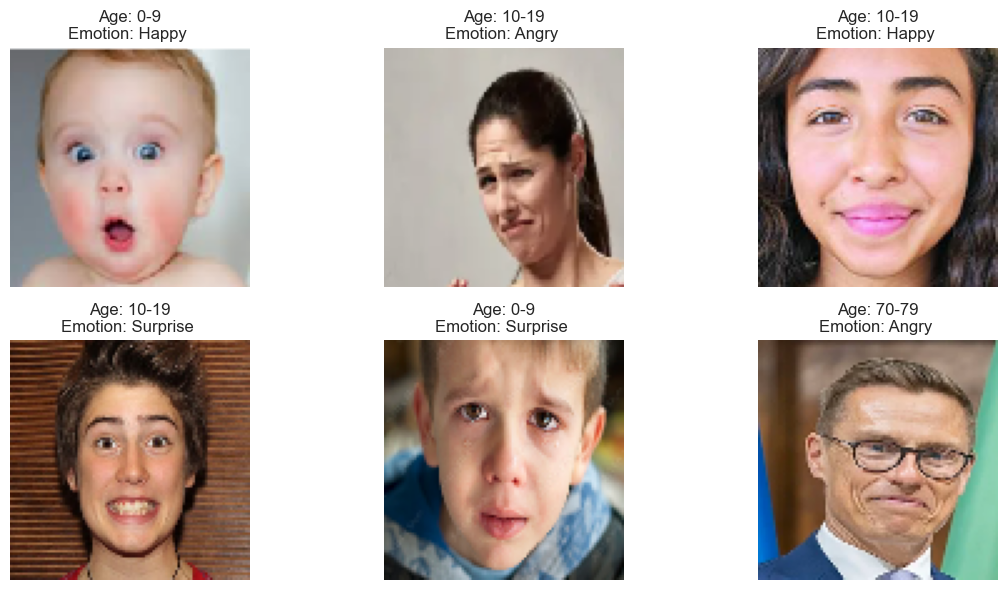

In [125]:
num_images_to_display = min(6, len(images_np))

plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    age = age_labels[np.argmax(age_preds[i])]
    emotion = emotion_labels[np.argmax(emotion_preds[i])]

    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(original_imgs[i])
    plt.axis('off')
    plt.title(f"Age: {age}\nEmotion: {emotion} ")

plt.tight_layout()
plt.show()